In [1]:
import numpy as np
import os 
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '0' 
import tensorflow as tf
from Networks import *
from Functions import *
import matplotlib.pyplot as plt
from tqdm import tqdm
def set_plot_style():
    # Funzione per calcolare le dimensioni della figura
    def figsize(full, iphi=0.6180469715698392):
        width = 3.487 * (2.0 if full else 1.0)
        height = width * iphi
        return (width, height)
    
    # Configurazione dei parametri matplotlib
    plt.rcParams.update({
        'text.usetex': True,
        'figure.dpi': 200,
        'figure.figsize': figsize(False),
        'path.simplify': True,
        'font.family': 'serif',
        'mathtext.fontset': 'custom',
        'xtick.major.size': 5,
        'ytick.major.size': 5,
        'xtick.minor.size': 2.5,
        'ytick.minor.size': 2.5,
        'xtick.major.width': 0.8,
        'ytick.major.width': 0.8,
        'xtick.minor.width': 0.8,
        'ytick.minor.width': 0.8,
        'lines.markeredgewidth': 0.8,
        'legend.numpoints': 1,
        'legend.frameon': True,
        'legend.handletextpad': 0.3,
        'xtick.labelsize': 8,
        'ytick.labelsize': 8,
        'axes.labelsize': 8,
        'legend.fontsize': 7,
        'legend.title_fontsize': 7,
        'lines.linewidth': 1.0,
        'lines.markersize': 3.0
    })

# Codice principale per il plot
set_plot_style()  # Applica lo stile

In [2]:
def plot(Rv1, magn_media_end_HOP, magn_media_end_DENSE_HOP, magn_media_end_EXP, N, K, r, P):
    y=3
    ϕ = (1+np.sqrt(5))/2
    fig = plt.figure(figsize=(y*ϕ*2,y))

    plt.subplot(1,3,1)
    plt.cla()
    plt.title('Hopfield')
    plt.text(0.05,0.925, f"N={N}", size = 15)
    plt.text(0.05,0.8, f"K={K}", size = 15)
    mean = np.array([i[0] for i in magn_media_end_HOP])
    up = np.array([i[2]-i[0] for i in magn_media_end_HOP])
    bottom = np.array([i[0]-i[1] for i in magn_media_end_HOP])
    plt.errorbar(Rv1, mean, yerr=[bottom, up], fmt='o', capsize=3, capthick=0.5, elinewidth=1.1)
    #plt.plot(Rv1, mean, color='black')
    plt.plot(Rv1, Rv1, linestyle='dotted', color='black')
    plt.xlabel("$m^{(0)}$", size = 15)
    plt.ylabel("$m^{(1)}$", size = 15)
    plt.yticks(np.linspace(0, 1, 6), size=12)
    plt.xticks(np.linspace(0, 1, 6), size=12)
    plt.ylim(-0.05,1.05)
    plt.xlim(0,1)
    
    
    plt.subplot(1,3,2)
    plt.cla()
    plt.title(f'Dense Hopfield P={P}')
    mean = np.array([i[0] for i in magn_media_end_DENSE_HOP])
    up = np.array([i[2]-i[0] for i in magn_media_end_DENSE_HOP])
    bottom = np.array([i[0]-i[1] for i in magn_media_end_DENSE_HOP])
    plt.errorbar(Rv1, mean, yerr=[bottom/2, up/2], fmt='o', capsize=3, capthick=0.5, elinewidth=1.1)
    plt.errorbar(Rv1, mean, yerr=[bottom/2, up/2], fmt='o', capsize=3, capthick=0.5, elinewidth=1.1)
    #plt.errorbar(Rv1, mean, yerr=[bottom/2, up/2], fmt='o', capsize=3, capthick=0.5, elinewidth=1.1)
    plt.vlines(r, -1,2, colors='darkred', label = '$r_{\\otimes}$')
    #plt.plot(Rv1, mean, color='lightgreen')
    plt.plot(Rv1, Rv1, linestyle='dotted', color='black')
    plt.xlabel("$m^{(0)}$", size = 15)
    plt.yticks(np.linspace(0, 1, 6), ['']*6)
    plt.xticks(np.linspace(0, 1, 6), size=12)
    plt.ylim(-0.05,1.05)
    plt.xlim(0,1)

    plt.subplot(1,3,3)
    plt.cla()
    plt.title('Exponential Hopfield')
    mean = np.array([i[0] for i in magn_media_end_EXP])
    up = np.array([i[2]-i[0] for i in magn_media_end_EXP])
    bottom = np.array([i[0]-i[1] for i in magn_media_end_EXP])
    plt.errorbar(Rv1, mean, yerr=[bottom/2, up/2], fmt='o', capsize=3, capthick=0.5, elinewidth=1.1)
    plt.errorbar(Rv1, mean, yerr=[bottom/2, up/2], fmt='o', capsize=3, capthick=0.5, elinewidth=1.1)
    plt.errorbar(Rv1, mean, yerr=[bottom/2, up/2], fmt='o', capsize=3, capthick=0.5, elinewidth=1.1)
    plt.vlines(r, -1,2, colors='darkred', label = '$r_{\\otimes}$')
    plt.plot(Rv1, mean, color='lightgreen')
    plt.plot(Rv1, Rv1, linestyle='dotted', color='black')
    plt.xlabel("$m^{(0)}$", size = 15)
    plt.yticks(np.linspace(0, 1, 6), ['']*6)
    plt.xticks(np.linspace(0, 1, 6), size=12)
    plt.ylim(-0.05,1.05)
    plt.xlim(0,1)


    plt.tight_layout()
    plt.show()

In [3]:
def K_r(N,r):
    num=((1+r)+(1-r)*np.exp(-2))**2
    denom = 2*(1+np.exp(-4))
    return int((num/denom)**(N-1)/(2*np.log(N)))

In [5]:
N = 30; iter = 10; M=1; r = 0.64; K=K_r(N,r); P=4
K, K/N, N**3


(2554, 85.13333333333334, 27000)

In [6]:
magn_media_start = []
magn_media_end_HOP = []
magn_media_end_DENSE_HOP = []
magn_media_end_EXP = []
Rv1 = np.linspace(0, 1, 25)
for rs in tqdm(Rv1):
    ξ = gen_patterns(N,K, iter)
    Net = Exp_Network()
    Net_Hopfield = Exp_Network()
    Net_D_Hopfield = Exp_Network()
    σr = gen_dataset(ξ, rs, M)
    Net.prepare(ξ, 'exp', 2)
    Net_Hopfield.prepare(ξ,'Hopfield',2)
    Net_D_Hopfield.prepare(ξ,'Hopfield', 4)
    Net.dynamics(σr, 1)
    Net_Hopfield.dynamics(σr, 1)
    Net_D_Hopfield.dynamics(σr, 1)
    start = tf.abs(tf.einsum("ALi, Ai->AL" ,σr, ξ[:,0,:])/σr.shape[-1])
    Hop = tf.abs(tf.einsum("ALi, Ai->AL" ,Net_Hopfield.σ, ξ[:,0,:])/σr.shape[-1])
    D_Hop = tf.abs(tf.einsum("ALi, Ai->AL" ,Net_D_Hopfield.σ, ξ[:,0,:])/σr.shape[-1])
    Exp = tf.abs(tf.einsum("ALi, Ai->AL" ,Net.σ, ξ[:,0,:])/σr.shape[-1])
    magn_media_start.append([np.quantile(start, 0.5), np.quantile(start, 0.25), np.quantile(start, 0.75)])
    magn_media_end_HOP.append([np.quantile(Hop, 0.5),np.quantile(Hop, 0.25), np.quantile(Hop, 0.75)])
    magn_media_end_DENSE_HOP.append([np.quantile(D_Hop, 0.5),np.quantile(D_Hop, 0.25), np.quantile(D_Hop, 0.75)])
    magn_media_end_EXP.append([np.quantile(Exp, 0.5),np.quantile(Exp, 0.25), np.quantile(Exp, 0.75)])


  0%|          | 0/25 [00:00<?, ?it/s]2025-02-26 00:16:57.957511: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2
2025-02-26 00:16:57.957541: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2025-02-26 00:16:57.957566: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2025-02-26 00:16:57.958318: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-02-26 00:16:57.958426: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
100%|██████████| 25/25 [00:01<00:00, 24.23it/s]


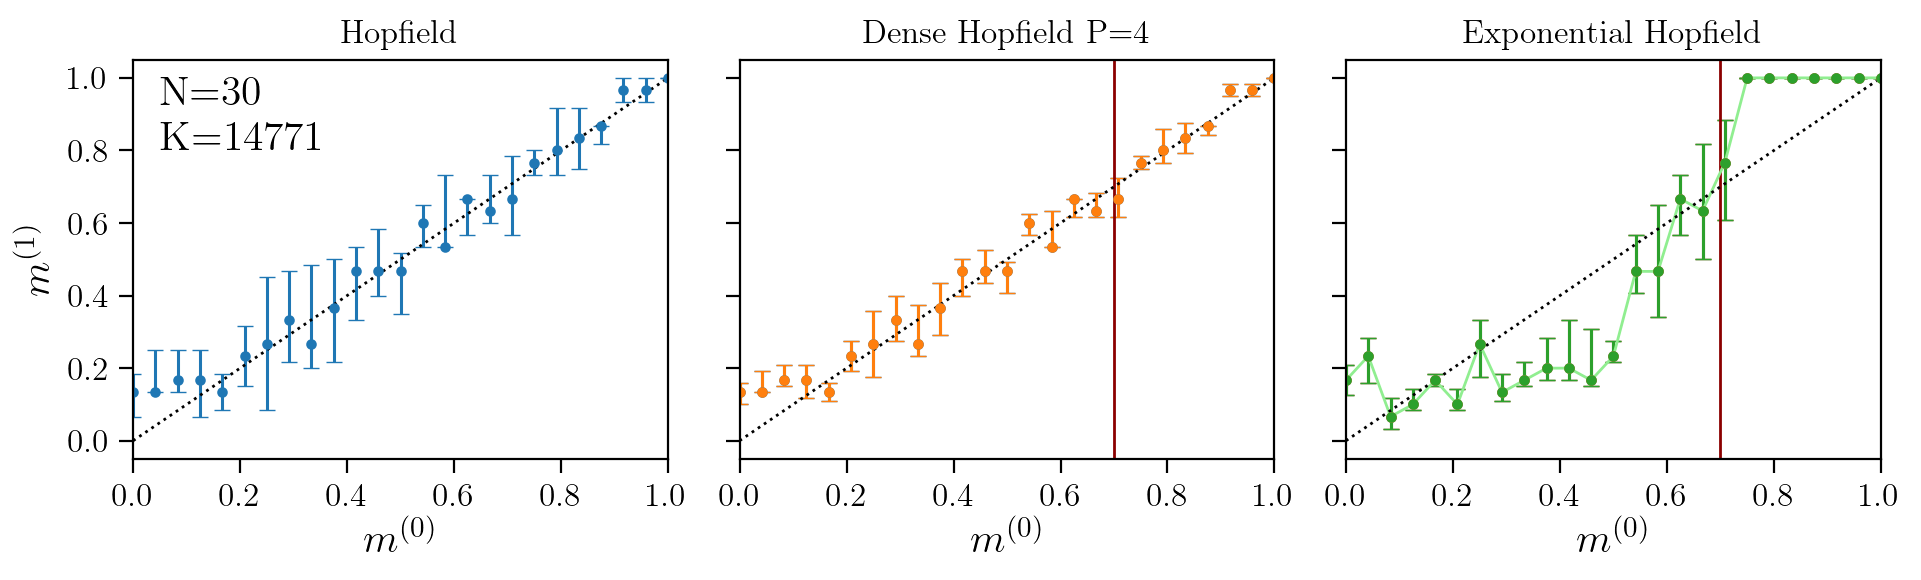

In [13]:
plot(Rv1, magn_media_end_HOP,magn_media_end_DENSE_HOP, magn_media_end_EXP, N, K, r, P)